**ASSIGNMENT 2**

Lawrence Patrick Fraginal 

1004071489

Prof. Shion Guha

April 12, 2022

In [2]:
#import the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy import stats as stats
import dataframe_image as dfi

In [3]:
#read in the data
diabetes = pd.read_csv("C:/Users/FRAGINAL/Downloads/diabetes (2).csv")

In [4]:
#viewing the data
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

**DATA CLEANING**

For my midterm submission, I used a one way ANOVA model to uncover whether there was a statistically significant difference in the glucose levels of those with diabetes and those without diabetes. I used post hoc tests to evaluate exactly what the differences were. Finally, I used a multiple regression model to evaluate which variables were the most influential in diagnosing a patient with diabetes. 

For the final submission, I have decided to conduct an analysis along a new categorical variable: BMI categories. I will use these to evaluate the differences in the glucose levels according to a person's weight class. I will evaluate whether there is meaningful statistical difference between those who are categorized as obese and those who are overweight. To build on my work in the prevous submission, I will control for the effect of the diabetes pedigree function to acheive a result that is less biased. 

In [5]:
#Step 1: Map the BMI categories into the dataset 
def bmi_categories(bmi): 
    if bmi < 18.5:
        return('Underweight')
    elif 18.5 <= bmi < 25:
        return('Healthy')
    elif 25 <= bmi < 30:
        return('Overweight')
    else:
        return('Obese')
    
diabetes['WeightClass'] = diabetes['BMI'].apply(bmi_categories)

In [6]:
#check to see if the changes were made
diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome WeightClass  
0                       0.627   50        1       Obese  
1                       0.351   31        0  Overweight  
2                       0.672   32        1     Healthy  
3                       0.167   21        0  Overweight  
4                       2.288   33        1       Obese  
..                        ...  ...      ...         ...  
763                     0.171   63        0       Obese  
764                     0.340   27        0       Obese  
765                     0.245   30        0  Overweight  
766                     0.349   47        1       Obese  
767                     0.315   23        0       Obese  

[768 rows x 10 columns]

**EXPLORATORY DATA ANALYSIS**

In [7]:
diabetes.describe()
#yields descriptive statistics 

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Text(0.5, 1.0, 'Glucose Levels by BMI')

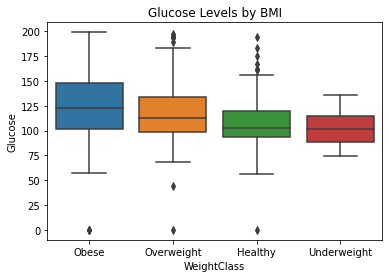

In [8]:
sns.boxplot(data=diabetes, x='WeightClass', y='Glucose').set_title('Glucose Levels by BMI')
#interpretation: obese seems to have the highest average mean glucose level

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

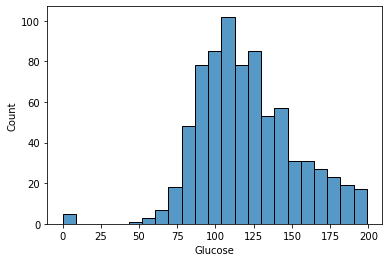

In [9]:
sns.histplot(data=diabetes, x='Glucose')
#interpretation: refreshing the fact that glucose has an approximately normal distribution

In [10]:
sns.regplot(data=diabetes, x='DiabetesPedigreeFunction', y='Glucose')
#interpretation: refreshing the fact that glucose seems to increase as diabetes pedigree function increases

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>

In [11]:
# t tests
# first, need to convert the information in the pandas series for overweight and obese to a list

overweight = diabetes.loc[lambda x: (x['WeightClass'] == 'Overweight')]
obese = diabetes.loc[lambda x: (x['WeightClass'] == 'Obese')]

overweight1 = overweight['Glucose'].to_list()
obese1 = obese['Glucose'].to_list()

In [12]:
# t test results
tStat, pValue = stats.ttest_ind(overweight1, obese1, equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue, tStat))

## interpretation: we reject the null hypothesis that both of the means are equal. 
## note: could conduct more independent sample t tests to analyze the difference in the means between each WeightClass,
## but for time's sake, we will simply move onto the analysis. 

P-Value:0.00026382439726032686 T-Statistic:-3.6838914791507387


**ASSUMPTION TESTING**

Here, I test the assumptions for the glucose variable to verify whether the data is suitable for the parametric tests that we are conducting. 

In [13]:
# normality test: Shapiro-Wilk 
gluc = diabetes['Glucose'].values

W, pValue = stats.shapiro(gluc)
print('W: {0}, p-Value:{1}'.format(W, pValue))

## interpretation: data is not drawn from a normal distribution. 

W: 0.9701042175292969, p-Value:1.9867612763291298e-11


In [14]:
# homogeneity of variance test: Bartlett
# first need to get the glucose values for each individual weight class 

ob = diabetes[diabetes['WeightClass'] == 'Obese']
ob1 = ob['Glucose'].values

over = diabetes[diabetes['WeightClass'] == 'Overweight']
over1 = over['Glucose'].values

In [15]:
# test for equal variance
W1, pValue1 = stats.bartlett(ob1, over1)
print('W: {0}, p-Value: {1}'.format(W1, pValue1))

## interpretation: data for the weight classes do not have the same variance

W: 5.791940102253952, p-Value: 0.016099811880473842


**ANOVA**

Since my last submission did not include an ANOVA analysis for these categories, I have decided to include both a regular ANOVA analysis and post-hoc tests to that I can compare the difference between the results of a regular ANOVA and the ANCOVA.

In [16]:
import pingouin as pg

In [17]:
# One way ANOVA on the difference in the means for those of different weight classes
aov = pg.anova(data=diabetes, dv='Glucose', between='WeightClass', detailed = True)
aov
## interpretation: statistically significant difference in the means, denoted by the low p Value

Source             SS   DF            MS          F         p-unc  \
0  WeightClass   38519.341587    3  12839.780529  13.157611  2.202053e-08   
1       Within  745545.115444  764    975.844392        NaN           NaN   

        np2  
0  0.049128  
1       NaN

In [18]:
#Tukey HSD post hoc test
post_hoc = pg.pairwise_tukey(dv='Glucose', between='WeightClass', effsize = 'cohen', data= diabetes)
post_hoc
## interpretation: those who are obese have a 9.668462 difference in their means 

A            B     mean(A)     mean(B)       diff        se  \
0     Healthy        Obese  107.980392  126.014831 -18.034438  3.410948   
1     Healthy   Overweight  107.980392  116.346369  -8.365977  3.875403   
2     Healthy  Underweight  107.980392  101.866667   6.113725  8.638483   
3       Obese   Overweight  126.014831  116.346369   9.668462  2.742100   
4       Obese  Underweight  126.014831  101.866667  24.148164  8.192909   
5  Overweight  Underweight  116.346369  101.866667  14.479702  8.396900   

          T       p-tukey     cohen  
0 -5.287221  9.694995e-07 -0.577314  
1 -2.158737  1.358633e-01 -0.267810  
2  0.707731  8.940444e-01  0.195711  
3  3.525934  2.517999e-03  0.309505  
4  2.947447  1.735593e-02  0.773026  
5  1.724410  3.116313e-01  0.463521

In [19]:
## using statsmodels to check the accuracy of the model
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Glucose ~ WeightClass',
         data=diabetes).fit()

In [20]:
mod.summary()
## accuracy for the model is horrible; only 4-5% of the variation in the means is explained by the model. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     13.16
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           2.20e-08
Time:                        21:15:15   Log-Likelihood:                -3730.9
No. Observations:                 768   AIC:                             7470.
Df Residuals:                     764   BIC:                             7488.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    107.9804      3.093     34.910      0.000     101.908     114.052
WeightClass[T.Obese]          18.0344      3.411      5.287      0.000      11.338      24.730
WeightClass[T.Overweight]      8.3660      3.875      2.159      0.031       0.758      15.974
WeightClass[T.Underweight]    -6.1137      8.638     -0.708      0.479     -23.072      10.844
==============================================================================
Omnibus:                       12.601   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.595
Skew:                           0.076   Prob(JB):                     3.37e-05
Kurtosis:                       3.788   Cond. No.                         9.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**ANCOVA**

In [21]:
from pingouin import ancova
pg.ancova(data=diabetes, dv='Glucose', covar='DiabetesPedigreeFunction', between='WeightClass')
## interpretation: after controlling for the BMI covariate, we discover 

Source             SS   DF          F         p-unc  \
0               WeightClass   34120.292570    3  11.804207  1.452807e-07   
1  DiabetesPedigreeFunction   10389.609337    1  10.783123  1.070990e-03   
2                  Residual  735155.506107  763        NaN           NaN   

        np2  
0  0.044354  
1  0.013936  
2       NaN

**POWER ANALYSIS**

In [22]:
# number of observations in the entire table
diabetes.count(axis=0)

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
WeightClass                 768
dtype: int64

In [23]:
# number of observations in the Obese weight class
diabetes[diabetes['WeightClass'] == 'Obese'].count()

Pregnancies                 472
Glucose                     472
BloodPressure               472
SkinThickness               472
Insulin                     472
BMI                         472
DiabetesPedigreeFunction    472
Age                         472
Outcome                     472
WeightClass                 472
dtype: int64

In [24]:
# number of observations in the Overweight weight class
diabetes[diabetes['WeightClass'] == 'Overweight'].count()

Pregnancies                 179
Glucose                     179
BloodPressure               179
SkinThickness               179
Insulin                     179
BMI                         179
DiabetesPedigreeFunction    179
Age                         179
Outcome                     179
WeightClass                 179
dtype: int64

In [25]:
# importing the necessary functions 
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

In [26]:
#calculating sample size required to acheive a high effect size
effect_size = 0.8
alpha = 0.05
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


In [27]:
# calculating the sample size required for a medium effect size
effect_size1 = 0.5
power_analysis1 = TTestIndPower()
sample_size1 = power_analysis.solve_power(effect_size = effect_size1, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size1))

Required sample size: 63.77


In [28]:
# calculating the sample size required for a low effect size 
effect_size2 = 0.2
power_analysis2 = TTestIndPower()
sample_size2 = power_analysis.solve_power(effect_size = effect_size2, 
                                         power = power,
                                         alpha = alpha)
print('Required sample size: {0:.2f}'.format(sample_size2))

Required sample size: 393.41


In [29]:
# calculating the sample size for a high effect size if alpha becomes more strict
alpha1 = 0.01
power_analysis3 = TTestIndPower()
sample_size3 = power_analysis.solve_power(effect_size = effect_size,
                                          alpha = 0.01,
                                         power = power)
print('Required sample size: {0:.2f}'.format(sample_size3))

Required sample size: 38.19


In [30]:
# calculating for a high effect size if the effect size is elevated even further, since 0.8 is insufficient
effect_size3 = 0.99
power_analysis4 = TTestIndPower()
sample_size4 = power_analysis.solve_power(effect_size = effect_size3,
                                         alpha = alpha,
                                         power = power)
print('Require sample size: {0:.2f}'.format(sample_size4))

Require sample size: 17.03


In [31]:
# plotting power curve
# note: code referenced can be found at https://www.geeksforgeeks.org/introduction-to-power-analysis-in-python/

effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)

plt.show()